### Task 02: Stock Price Predictor

In [10]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# loading the yfinance dataset
ticker = 'AAPL'  # Example: Apple stock
df = yf.download(ticker, start='2020-01-01', end='2025-06-28')

/tmp/ipython-input-11-3928736271.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2025-06-28')
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Exploration of data
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
2020-01-07,72.146919,72.753800,71.926892,72.497506,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [13]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-06-23,201.500000,202.300003,198.960007,201.630005,55814300
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700
2025-06-26,201.000000,202.639999,199.460007,201.429993,50799100
2025-06-27,201.080002,203.220001,200.000000,201.889999,73114100


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1379 entries, 2020-01-02 to 2025-06-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1379 non-null   float64
 1   (High, AAPL)    1379 non-null   float64
 2   (Low, AAPL)     1379 non-null   float64
 3   (Open, AAPL)    1379 non-null   float64
 4   (Volume, AAPL)  1379 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 64.6 KB


In [15]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1379.000000,1379.000000,1379.000000,1379.000000,1.379000e+03
mean,157.630697,159.268319,155.816940,157.473077,8.769422e+07
std,44.379258,44.633994,44.049414,44.333585,5.221187e+07
min,54.378574,55.379527,51.528408,55.277736,2.323470e+07
25%,129.248795,131.004102,127.824300,129.307652,5.343105e+07
50%,156.826538,159.299992,154.883162,157.067987,7.360430e+07
75%,186.845627,188.173949,185.704503,186.783222,1.040246e+08
max,258.396667,259.474086,257.010028,257.568678,4.265100e+08


In [16]:
df.shape

(1379, 5)

In [ ]:
# checking null values in dataset
df.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [ ]:
# Feature selection
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

In [ ]:
# Prepare dataset
df['Target'] = df['Close'].shift(-1)  # Next day's closing price as target
df = df.dropna()

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Choose and train model (Linear Regression)
model = LinearRegression()
# OR use Random Forest:
# model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


Mean Squared Error (MSE): 19.4558
R-squared (R2 Score): 0.9284


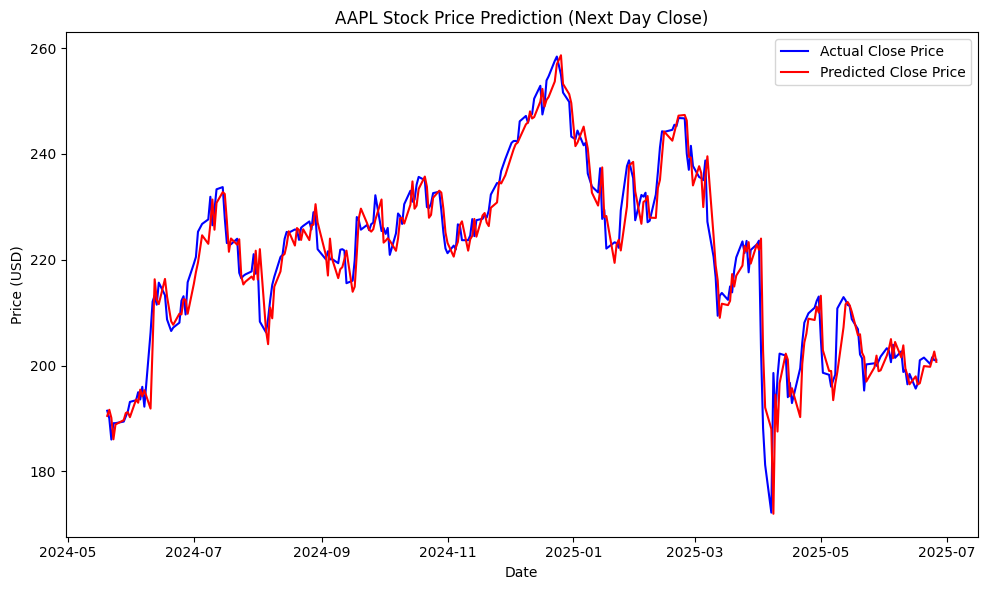

In [ ]:
# Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title(f'{ticker} Stock Price Prediction (Next Day Close)')
plt.legend()
plt.tight_layout()
plt.show()